# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_colwidth",None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")


# Project 
## Health And Lifestyle Prediction Analysis 

In [2]:
df=pd.read_csv("synthetic_health_lifestyle_dataset.csv")

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB


In [4]:
df.shape

(7500, 13)

In [5]:
df.sample()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
3028,3029,38,Female,153.7,96.3,40.8,No,3-5 times/week,Excellent,Moderate,No,7,7.4


# Data Cleaning & Handling

In [6]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [7]:
df["Exercise_Freq"]=df["Exercise_Freq"].fillna(df["Exercise_Freq"].mode()[0])
df["Alcohol_Consumption"]=df["Alcohol_Consumption"].fillna(df["Alcohol_Consumption"].mode()[0])

In [8]:
exercise_map={
    "Daily":2,
    "1-2 times/week":1,
    "3-5 times/week":0
}
df["Exercise_Freq"]=df["Exercise_Freq"].map(exercise_map)

In [9]:
df.drop(columns=["ID"],inplace=True)

In [10]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

# Average BMI Classification By Gender

In [11]:
classifi_bmi=df.groupby("Gender")["BMI"].mean().reset_index()
classifi_bmi

,Gender,BMI
0,Female,26.040837
1,Male,26.099020
2,Other,25.954326


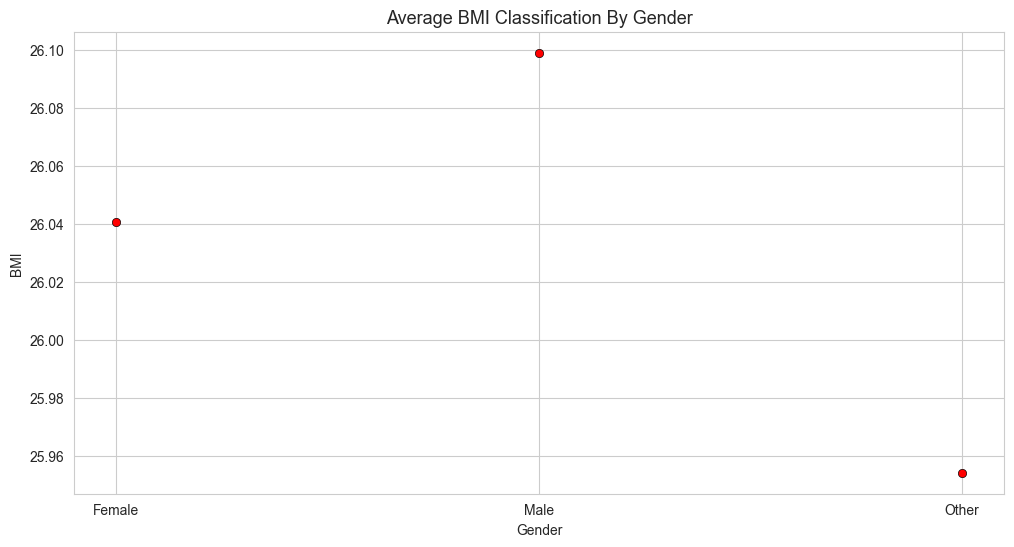

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.scatterplot(data=classifi_bmi,x="Gender",y="BMI",color="red",edgecolor="black")
plt.title("Average BMI Classification By Gender",size=13)
plt.show()

# Smoker & Non Smoker Classification Based On Gender 

In [13]:
classifi_sm=df.groupby(["Gender","Smoker"]).size().reset_index(name="Count")
classifi_sm.style.background_gradient(cmap="Reds")

,Gender,Smoker,Count
0,Female,No,1765
1,Female,Yes,745
2,Male,No,1783
3,Male,Yes,768
4,Other,No,1715
5,Other,Yes,724


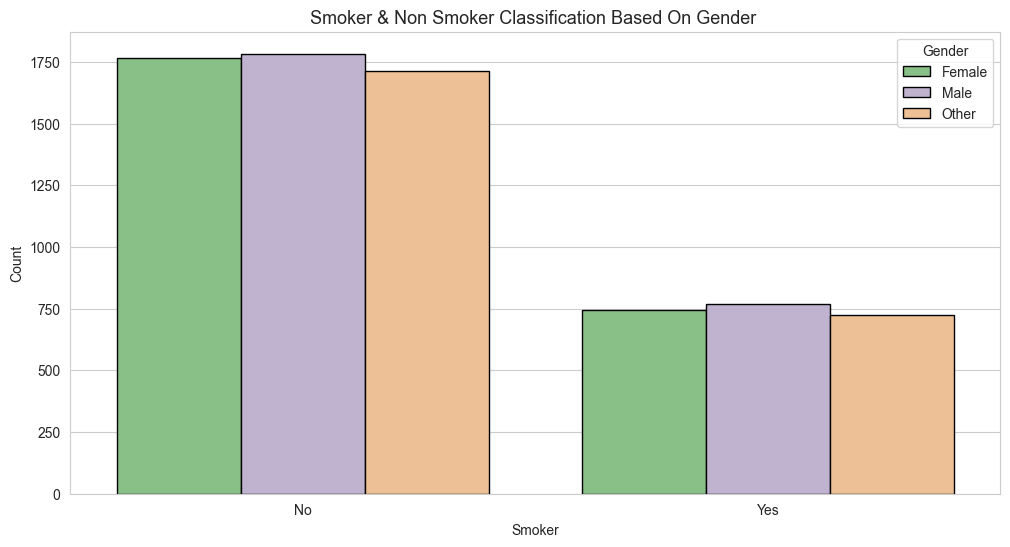

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=classifi_sm,x="Smoker",y="Count",hue="Gender",palette="Accent",edgecolor="black")
plt.title("Smoker & Non Smoker Classification Based On Gender ",size=13)
plt.show()

# Stress Level Classification By Gender

In [15]:
classifi_str=df.groupby("Gender")["Stress_Level"].sum().reset_index()
classifi_str.style.background_gradient(cmap="Oranges")

,Gender,Stress_Level
0,Female,14098
1,Male,14415
2,Other,13426


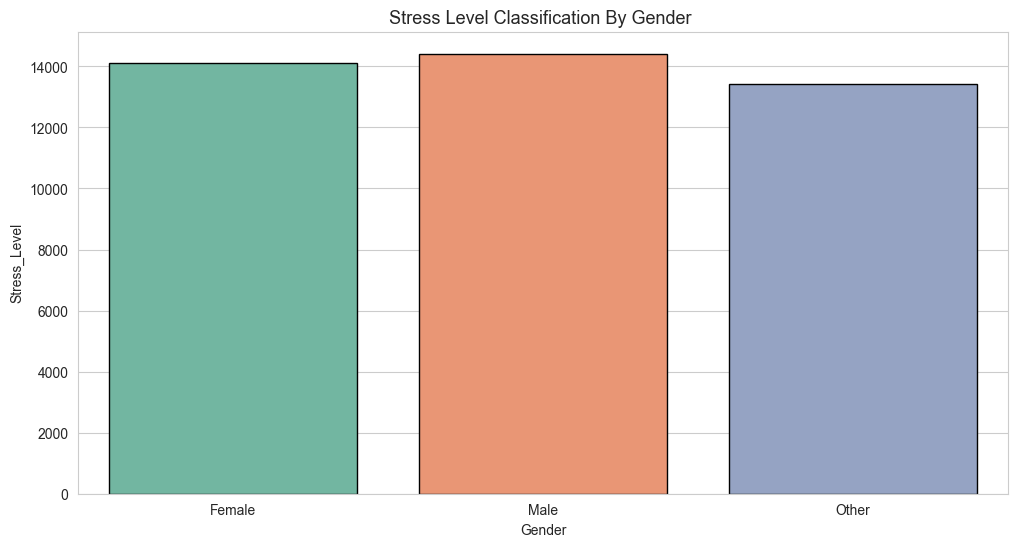

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=classifi_str,x="Gender",y="Stress_Level",palette="Set2",edgecolor="black")
plt.title("Stress Level Classification By Gender ",size=13)
plt.show()

# Diet Quality & Alcohol Consumption By Gender & Age 

In [17]:
classifi_di=df.groupby(["Gender","Age","Diet_Quality","Alcohol_Consumption"]).size().reset_index(name="Count")
classifi_di

,Gender,Age,Diet_Quality,Alcohol_Consumption,Count
0,Female,18,Average,High,1
1,Female,18,Average,Low,1
2,Female,18,Average,Moderate,1
3,Female,18,Excellent,High,2
4,Female,18,Excellent,Low,5
...,...,...,...,...,...
1805,Other,69,Good,Low,5
1806,Other,69,Good,Moderate,3
1807,Other,69,Poor,High,3
1808,Other,69,Poor,Low,6


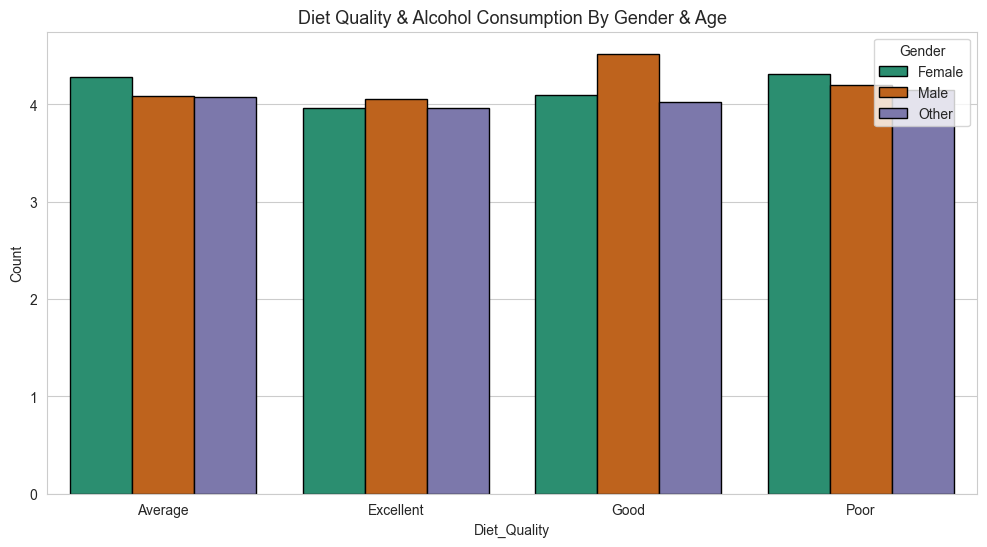

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_di,x="Diet_Quality",y="Count",hue="Gender",ci=None,palette="Dark2",edgecolor="black")
plt.title("Diet Quality & Alcohol Consumption By Gender & Age",size=13)
plt.show()

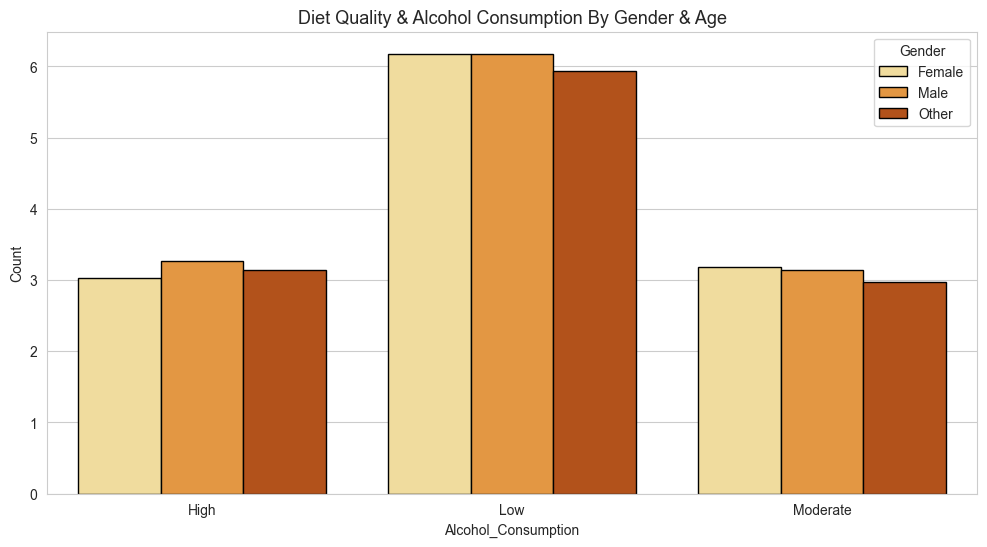

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_di,x="Alcohol_Consumption",y="Count",hue="Gender",ci=None,palette="YlOrBr",edgecolor="black")
plt.title("Diet Quality & Alcohol Consumption By Gender & Age",size=13)
plt.show()

# Average Sleep Hours By Gender 

In [20]:
classifi_sl=df.groupby("Gender")["Sleep_Hours"].mean().reset_index()
classifi_sl.style.background_gradient(cmap="Purples")

,Gender,Sleep_Hours
0,Female,7.023825
1,Male,7.008114
2,Other,6.976015


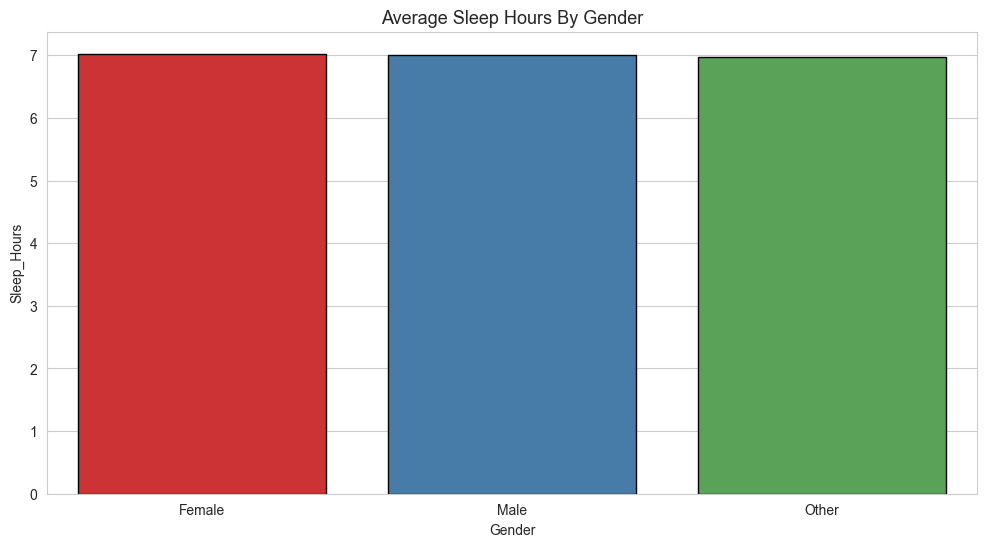

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_sl,x="Gender",y="Sleep_Hours",edgecolor="black",palette="Set1")
plt.title('Average Sleep Hours By Gender',size=13)
plt.show()

In [22]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,Other,177.6,37.3,11.8,Yes,2,Poor,Low,No,9,8.5
1,69,Other,169.3,70.7,24.7,No,1,Good,High,No,2,5.9
2,46,Female,159.1,69.0,27.3,No,2,Excellent,Moderate,No,3,4.8
3,32,Male,170.6,76.4,26.3,No,0,Excellent,Moderate,No,9,6.6
4,60,Male,158.4,60.4,24.1,No,0,Excellent,Low,Yes,6,6.1


# Machine Learning

In [23]:
le=LabelEncoder()
cols=df[["Gender","Diet_Quality","Alcohol_Consumption","Chronic_Disease","Smoker"]]
for col in cols:
    df[col]=le.fit_transform(df[col])

In [24]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,56,2,177.6,37.3,11.8,1,2,3,1,0,9,8.5
1,69,2,169.3,70.7,24.7,0,1,2,0,0,2,5.9
2,46,0,159.1,69.0,27.3,0,2,1,2,0,3,4.8
3,32,1,170.6,76.4,26.3,0,0,1,2,0,9,6.6
4,60,1,158.4,60.4,24.1,0,0,1,1,1,6,6.1


In [25]:
x=df.drop(columns=["Chronic_Disease"])
y=df["Chronic_Disease"]

In [26]:
# Step 1: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Logistic Regression Model

In [27]:
model=LogisticRegression(class_weight="balanced")
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred=model.predict(x_test)
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7993333333333333
Confusion Matrix:
 [[1199    0]
 [ 301    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1199
           1       0.00      0.00      0.00       301

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



## Random Forest Classifier Model

In [29]:
modelr = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # you can limit this if overfitting
    random_state=42, 
    class_weight="balanced" # helpful for imbalanced datasets
)
modelr.fit(x_train_scaled,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
df["Chronic_Disease"].value_counts()

Chronic_Disease
0    6052
1    1448
Name: count, dtype: int64

In [31]:
y_pred=modelr.predict(x_test_scaled)
# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.798
Confusion Matrix:
 [[1197    2]
 [ 301    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1199
           1       0.00      0.00      0.00       301

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



In [33]:
# ================================================
# 1. Import Library
# ================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ================================================
# 2. Load Dataset
# ================================================
df = pd.read_csv('synthetic_health_lifestyle_dataset.csv')
print("Ukuran dataset:", df.shape)
print(df.head())

# ================================================
# 3. Pra-pemrosesan Data
# ================================================
# Pisahkan fitur dan target
target_col = 'Health_Status'  # ganti jika kolom target berbeda
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode kolom kategorikal
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ================================================
# 4. Model Naive Bayes
# ================================================
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# ================================================
# 5. Evaluasi Model
# ================================================
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model Naive Bayes: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ================================================
# 6. Prediksi Data Baru (Opsional)
# ================================================
# contoh_input = X_test[0].reshape(1, -1)
# prediksi = nb_model.predict(contoh_input)
# print("Prediksi untuk 1 sampel:", prediksi)


Ukuran dataset: (7500, 13)
   ID  Age  Gender  Height_cm  Weight_kg   BMI Smoker   Exercise_Freq  \
0   1   56   Other      177.6       37.3  11.8    Yes             NaN   
1   2   69   Other      169.3       70.7  24.7     No  1-2 times/week   
2   3   46  Female      159.1       69.0  27.3     No           Daily   
3   4   32    Male      170.6       76.4  26.3     No  3-5 times/week   
4   5   60    Male      158.4       60.4  24.1     No  3-5 times/week   

  Diet_Quality Alcohol_Consumption Chronic_Disease  Stress_Level  Sleep_Hours  
0         Poor                 NaN              No             9          8.5  
1         Good                High              No             2          5.9  
2    Excellent            Moderate              No             3          4.8  
3    Excellent            Moderate              No             9          6.6  
4    Excellent                 Low             Yes             6          6.1  


KeyError: "['Health_Status'] not found in axis"

# Correlation Heatmap

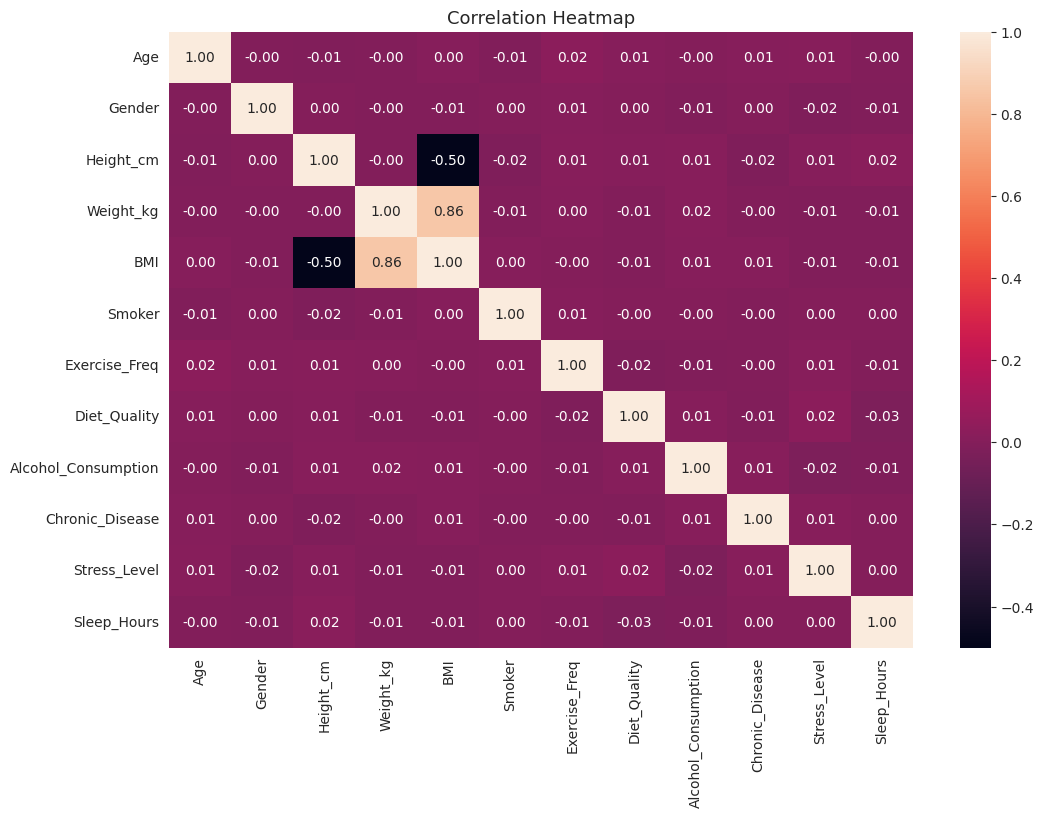

In [ ]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.title("Correlation Heatmap",size=13)
plt.show()